<a href="https://colab.research.google.com/github/Akramkhan01/Appliances-Energy-Prediction-Capstone-Project/blob/main/Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data-driven prediction of energy use of appliances**
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

date time year-month-day hour:minute:second
Appliances, energy use in Wh (Dependent variable)
lights, energy use of light fixtures in the house in Wh (Drop this column)

T1, Temperature in kitchen area, in Celsius

RH1, Humidity in kitchen area, in % T2, Temperature in living room area, in Celsius RH2,
Humidity in living room area, in %

T3, Temperature in laundry room area

RH3, Humidity in laundry room area, in % T4, Temperature in office room, in Celsius RH4,
Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH5, Humidity in bathroom, in % T6, Temperature outside the building (north side), in Celsius

RH6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH7, Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius RH8,
Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH9, Humidity in parents room, in % To, Temperature outside (from Chievres weather station), in
Celsius Pressure (from Chievres weather station), in mm Hg RHout, Humidity outside (from
Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station
(Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis,
rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of
weather data.

In [159]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [160]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the dataset

In [161]:
# Load the dataset
file_path = '/content/drive/MyDrive/Appliances Energy Prediction/'
df = pd.read_csv(file_path+'data_application_energy.csv')

In [162]:
# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [163]:
df.head()

date  Appliances  lights  ...  Tdewpoint        rv1        rv2
0  2016-01-11 17:00:00          60      30  ...        5.3  13.275433  13.275433
1  2016-01-11 17:10:00          60      30  ...        5.2  18.606195  18.606195
2  2016-01-11 17:20:00          50      30  ...        5.1  28.642668  28.642668
3  2016-01-11 17:30:00          50      40  ...        5.0  45.410389  45.410389
4  2016-01-11 17:40:00          60      40  ...        4.9  10.084097  10.084097

[5 rows x 29 columns]

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [165]:
# Check for null values

df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

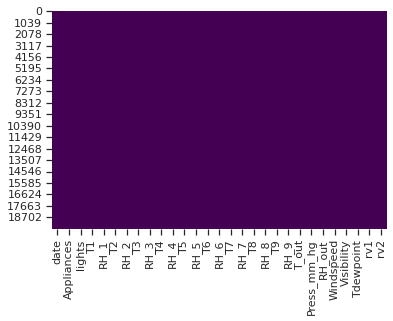

In [166]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [167]:
## Lets go and see the percentage of missing values
df.isnull().mean()

date           0.0
Appliances     0.0
lights         0.0
T1             0.0
RH_1           0.0
T2             0.0
RH_2           0.0
T3             0.0
RH_3           0.0
T4             0.0
RH_4           0.0
T5             0.0
RH_5           0.0
T6             0.0
RH_6           0.0
T7             0.0
RH_7           0.0
T8             0.0
RH_8           0.0
T9             0.0
RH_9           0.0
T_out          0.0
Press_mm_hg    0.0
RH_out         0.0
Windspeed      0.0
Visibility     0.0
Tdewpoint      0.0
rv1            0.0
rv2            0.0
dtype: float64

In [168]:
# Check for duplicates

duplicate_df = df[df.duplicated()]
duplicate_df

Empty DataFrame
Columns: [date, Appliances, lights, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, rv1, rv2]
Index: []

# We have no null values and duplicate records.

In [169]:
df['lights'].value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

# Light has maximum values as 0 it is better to drop it.

In [170]:
# Dropping Light Column
#df =df.drop('lights', axis=1)
#df.shape


In [171]:
df.describe()

Appliances        lights  ...           rv1           rv2
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      97.694958      3.801875  ...     24.988033     24.988033
std      102.524891      7.935988  ...     14.496634     14.496634
min       10.000000      0.000000  ...      0.005322      0.005322
25%       50.000000      0.000000  ...     12.497889     12.497889
50%       60.000000      0.000000  ...     24.897653     24.897653
75%      100.000000      0.000000  ...     37.583769     37.583769
max     1080.000000     70.000000  ...     49.996530     49.996530

[8 rows x 28 columns]

# **Exploratory Data Analysis**

# Dependent Variable - Appliances

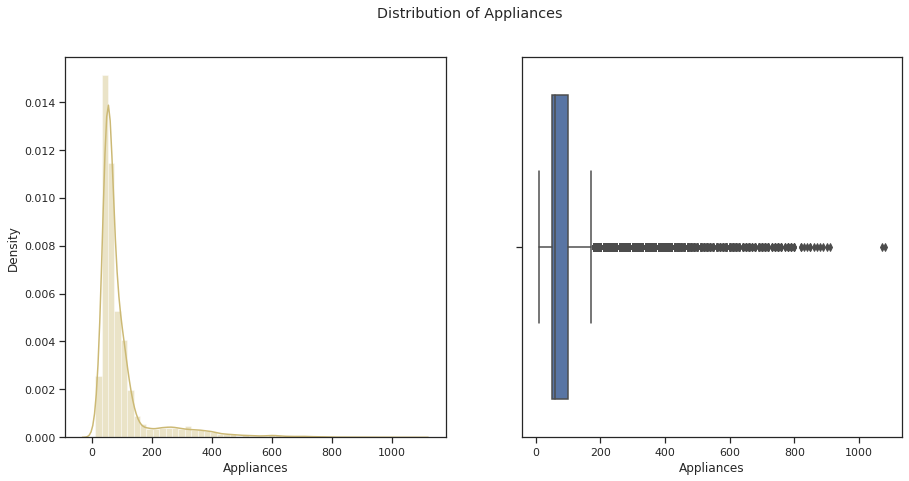

In [172]:
f, axes = plt.subplots(1, 2, figsize=(15,7))

f.suptitle('Distribution of Appliances')
sns.distplot(df['Appliances'], hist=True, ax=axes[0],color="y")
sns.boxplot(data=df, x='Appliances', ax=axes[1])

plt.show()

# Distribution is highly right skewed. Also, we can see there are outliers.

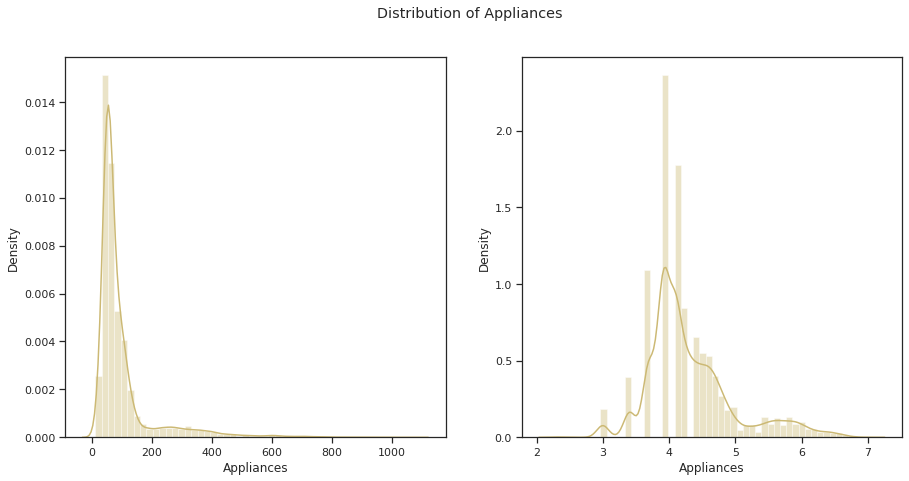

In [173]:
# Using log transformation to treat the skewness

f, axes = plt.subplots(1, 2, figsize=(15,7))

f.suptitle('Distribution of Appliances')
sns.distplot(df['Appliances'], hist=True, ax=axes[0],color='y')
sns.distplot(np.log(df['Appliances']), hist=True, ax=axes[1],color='y')

plt.show()

# **Lights**

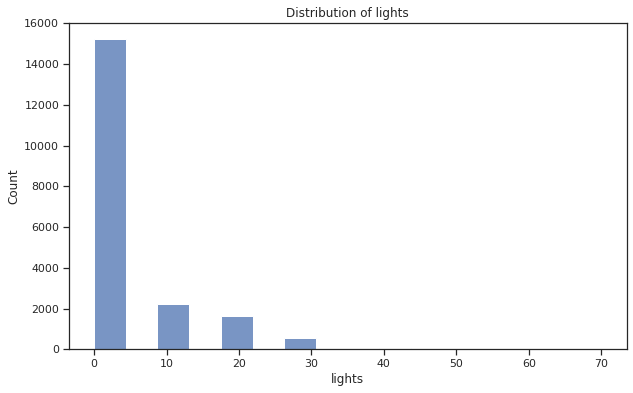

In [174]:
plt.figure(figsize = (10,6))
sns.histplot(data=df, x='lights')
plt.title(f'Distribution of lights')
plt.show()

In [175]:
df.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

## Light column has 15252 entires with value = 0. It could mean there is no human presence in that room at that time; or it could be during the day where  lights are not turned on; or it could be during the night when lights are  turned off. 

# Numeric Feature Univariate Analysis using Histogram

In [176]:
# Dropping Light Column
df =df.drop('lights', axis=1)
df.shape

(19735, 28)

In [177]:
numeric_features = df.describe().columns
numeric_features

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [178]:
len(numeric_features)

27

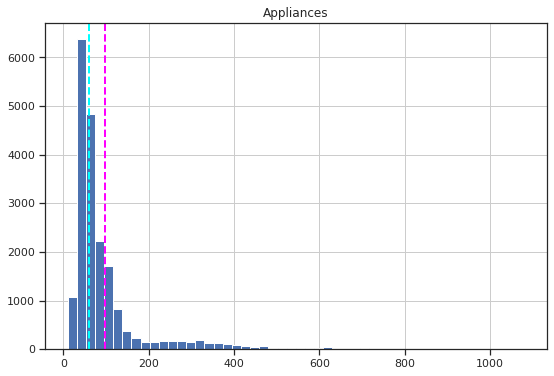

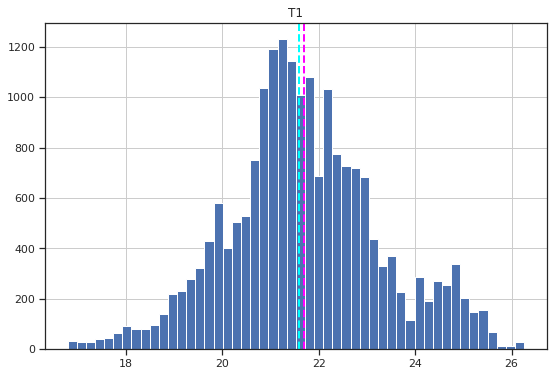

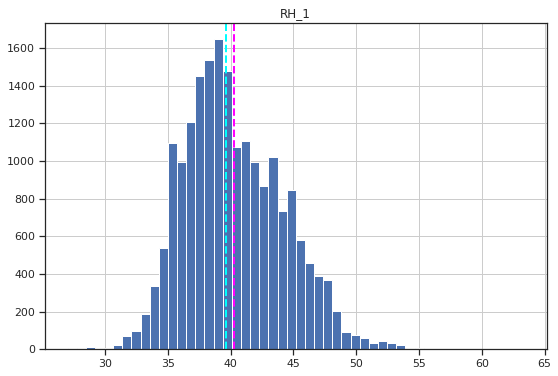

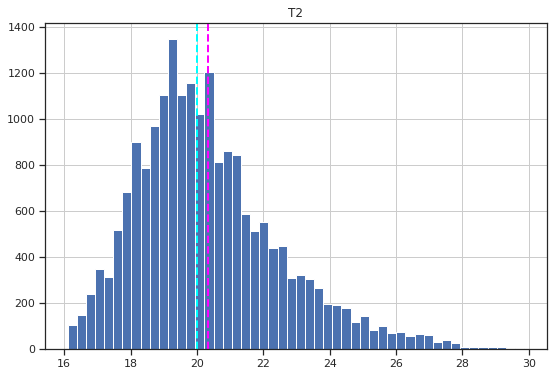

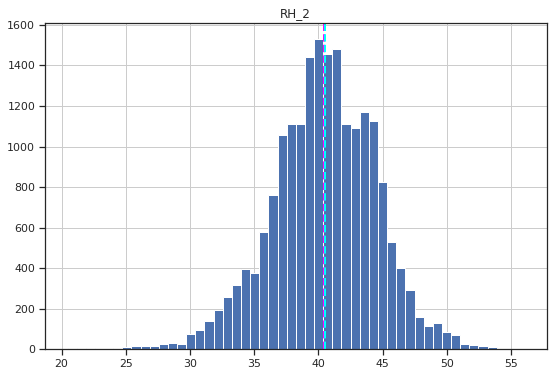

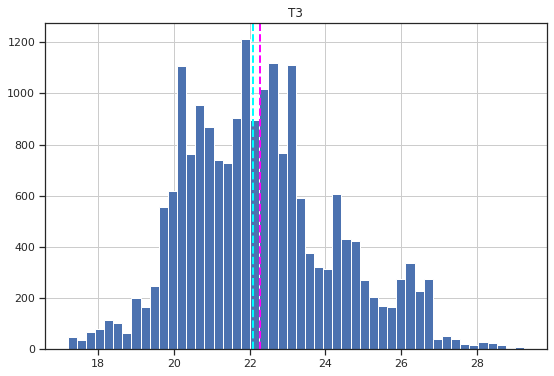

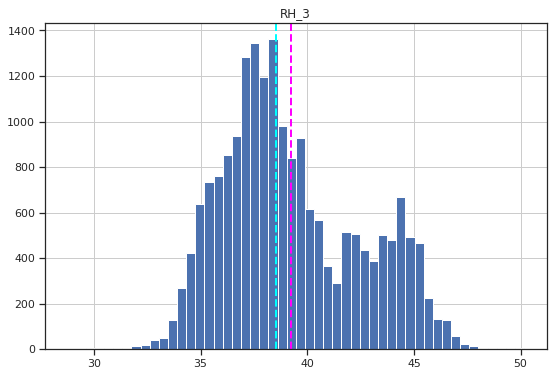

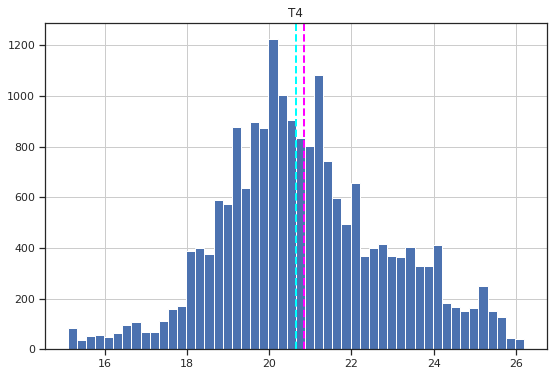

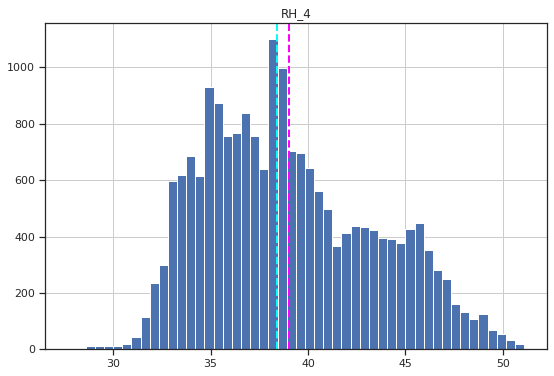

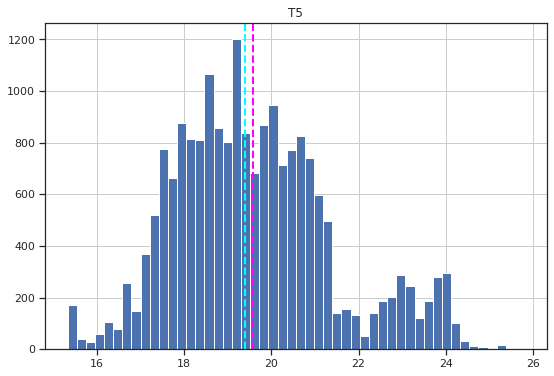

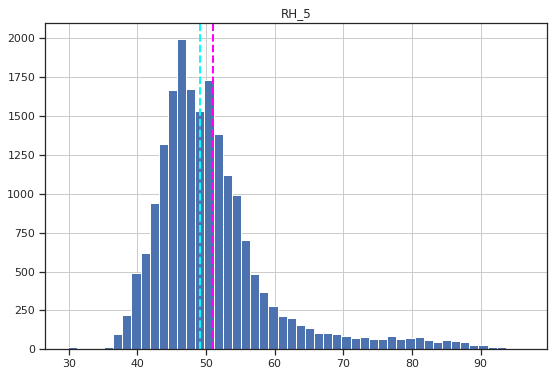

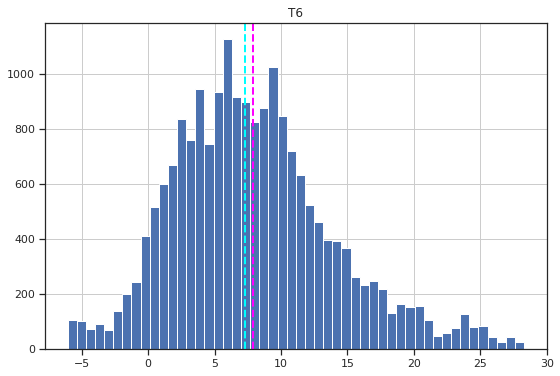

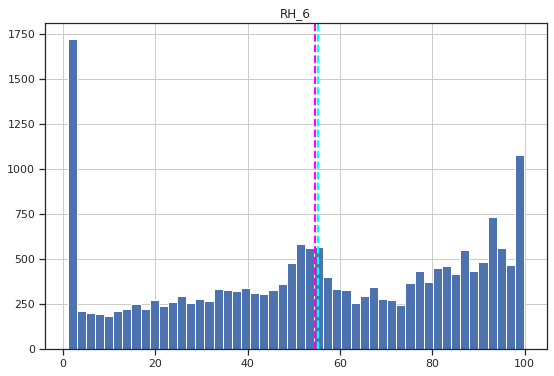

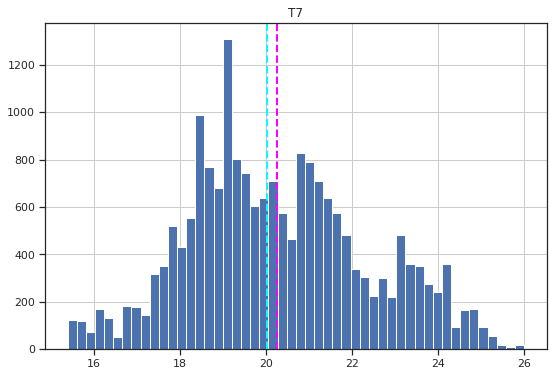

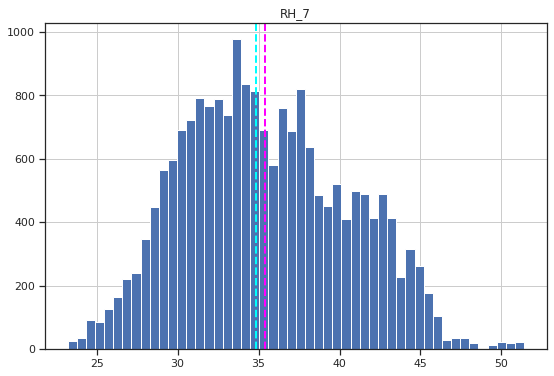

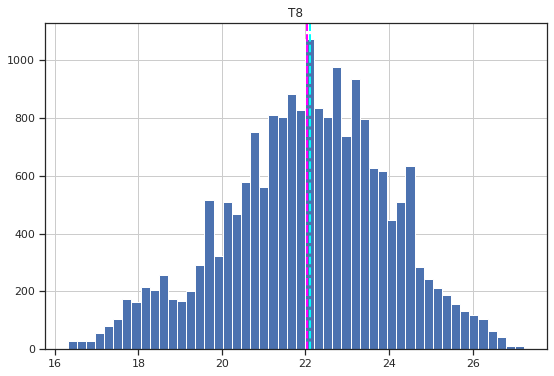

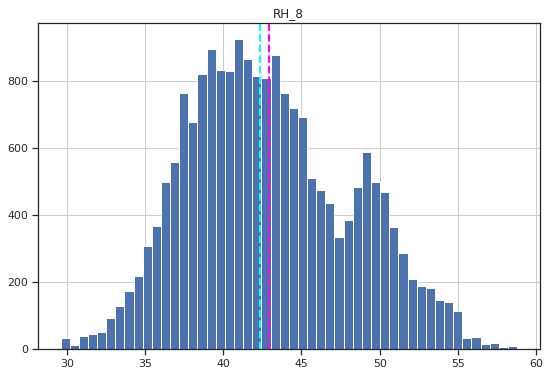

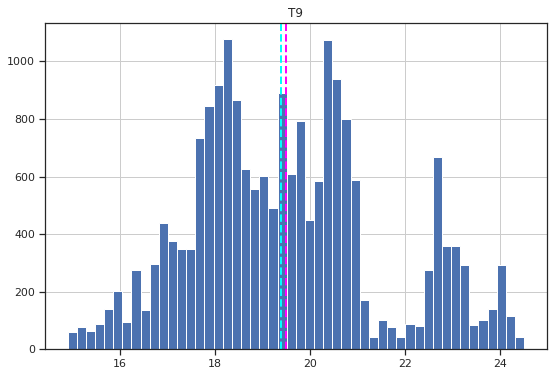

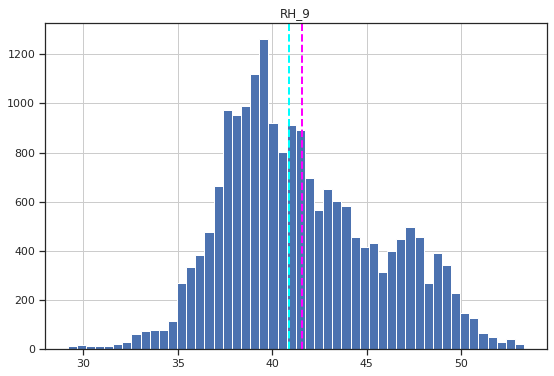

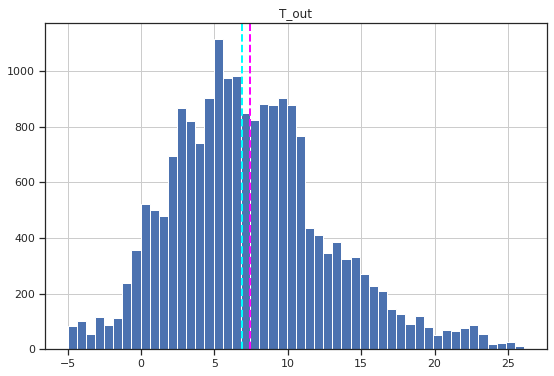

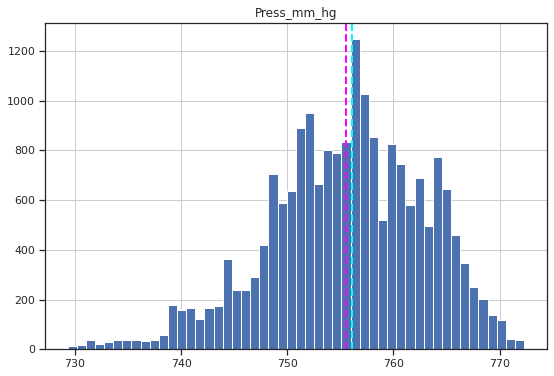

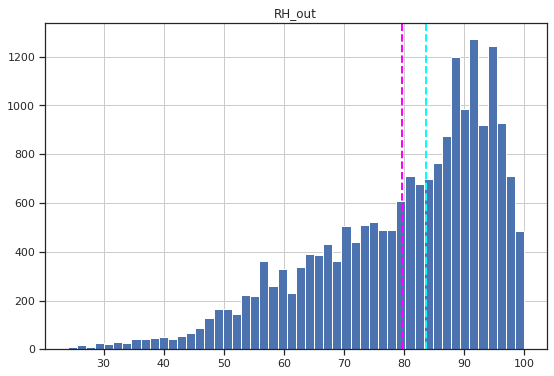

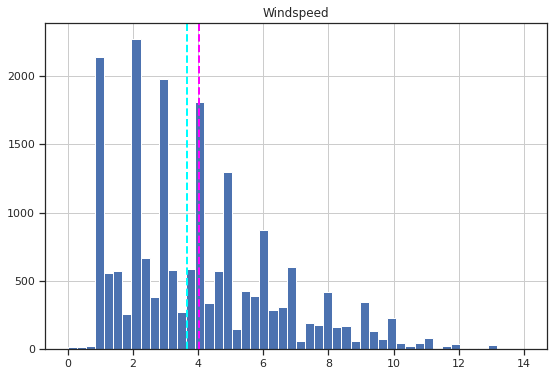

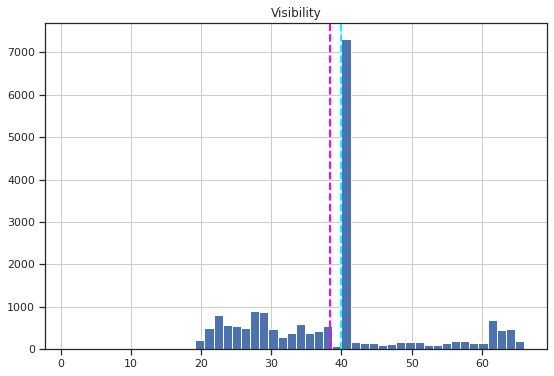

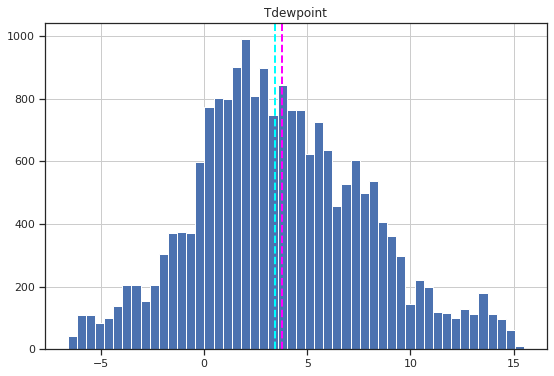

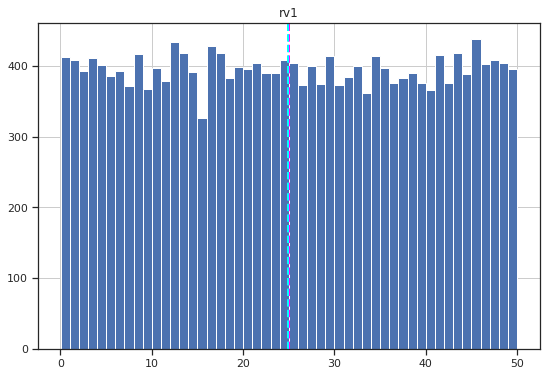

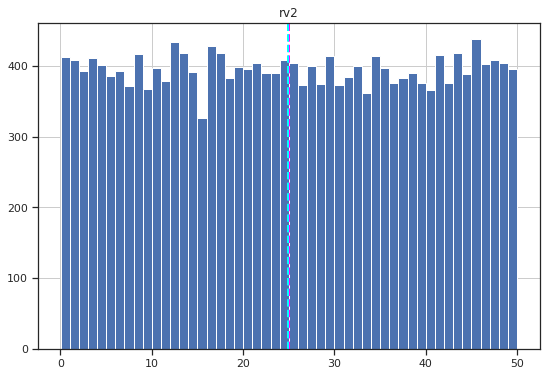

In [179]:
# plot a bar plot for each numerical feature count (except date)

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# Numeric Feature Univariate Analysis using Scatter Plot

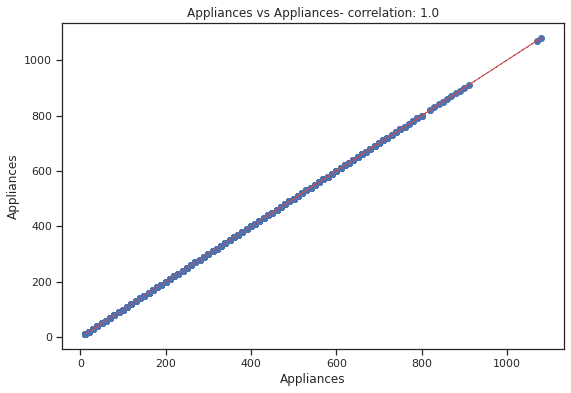

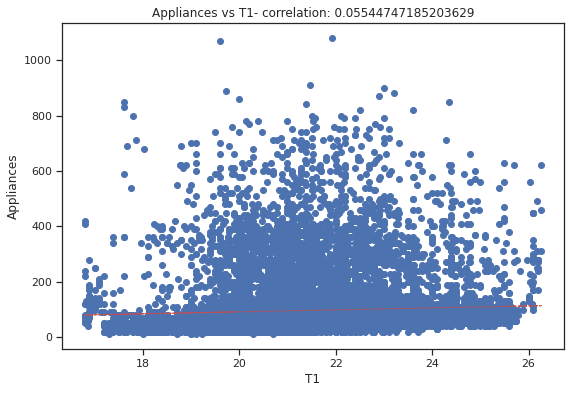

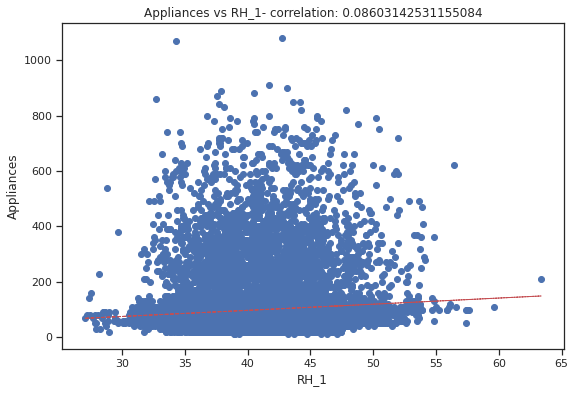

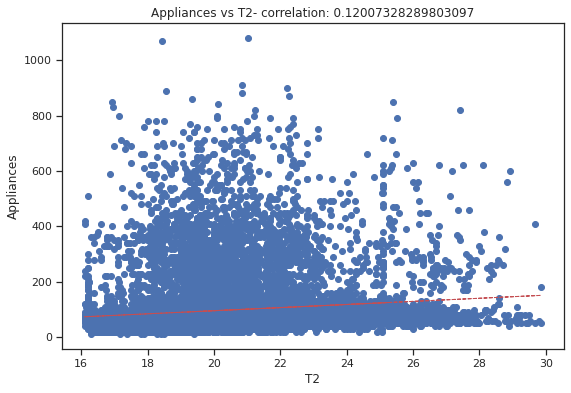

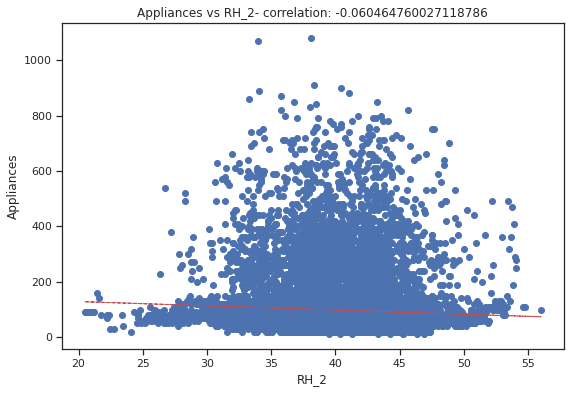

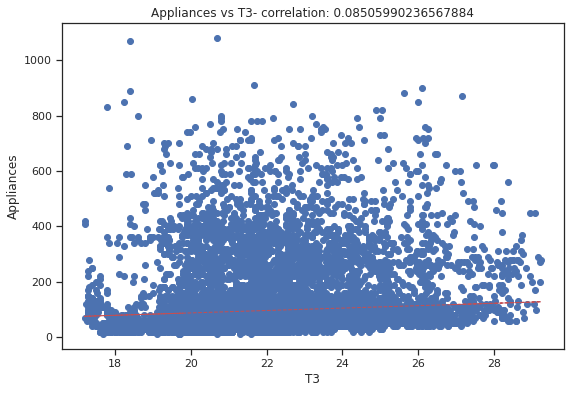

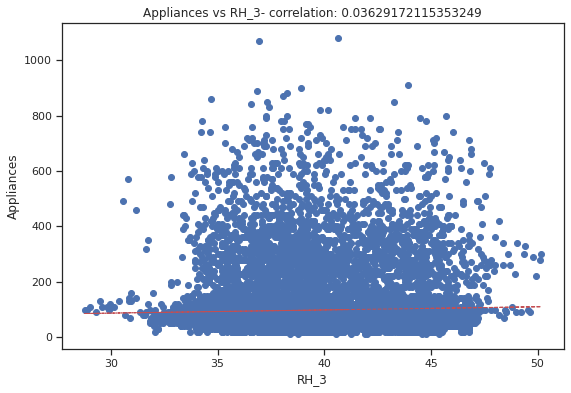

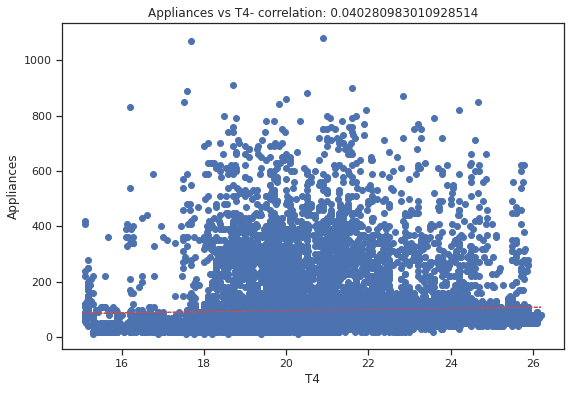

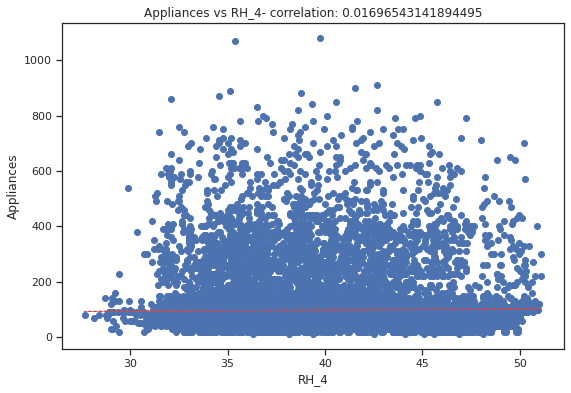

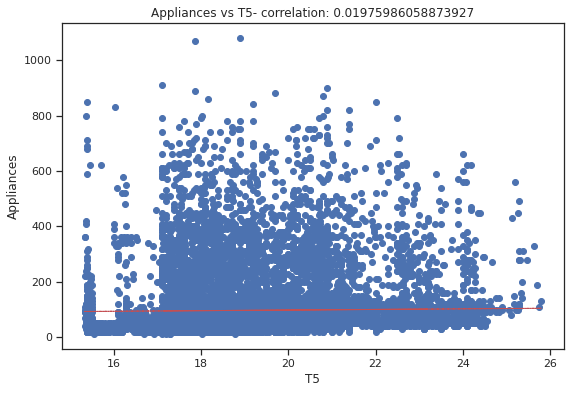

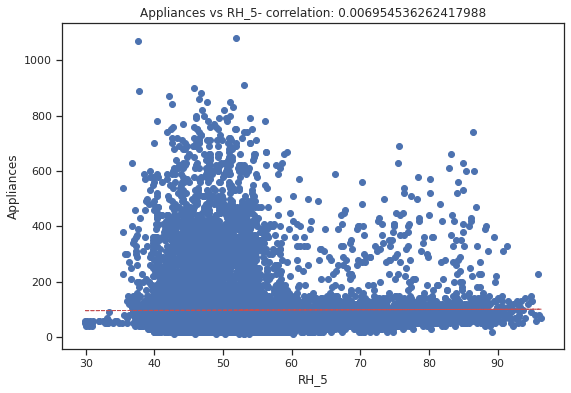

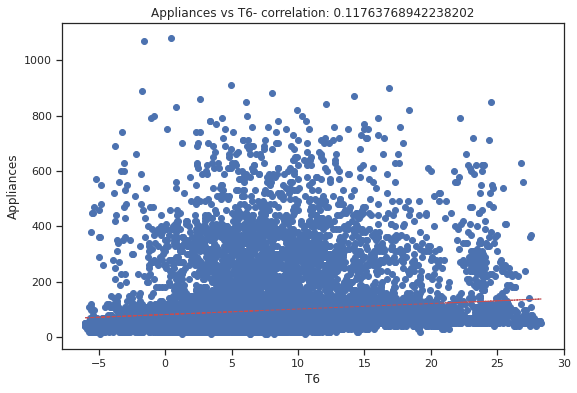

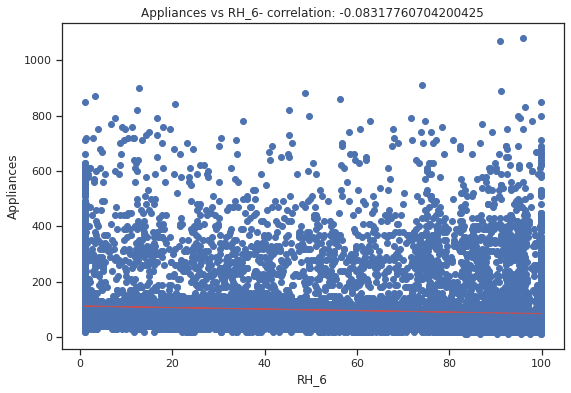

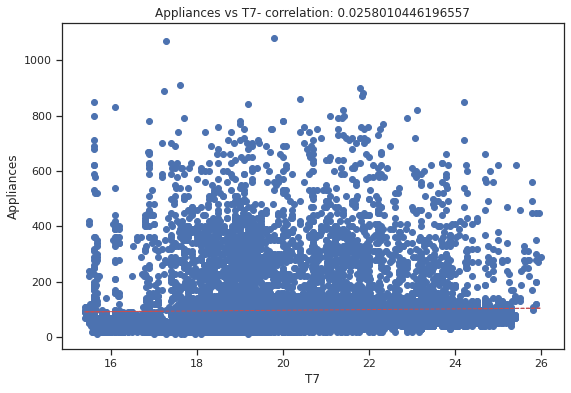

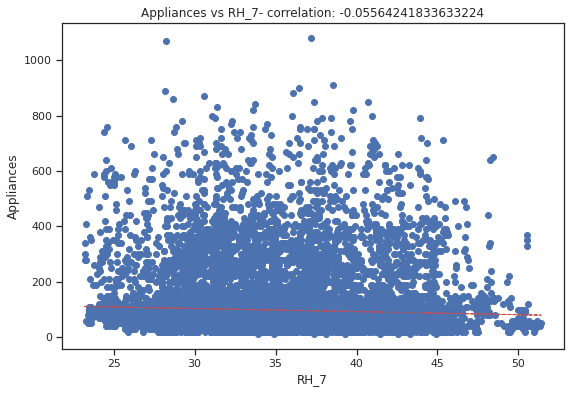

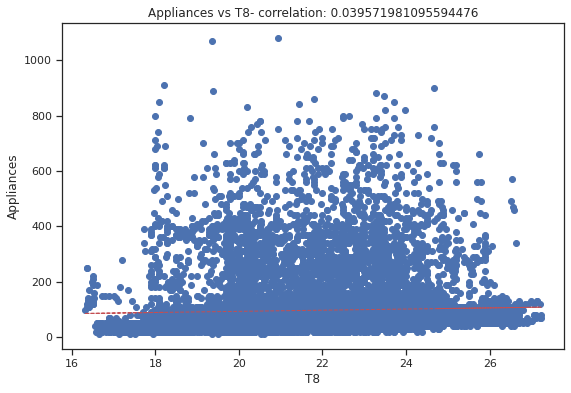

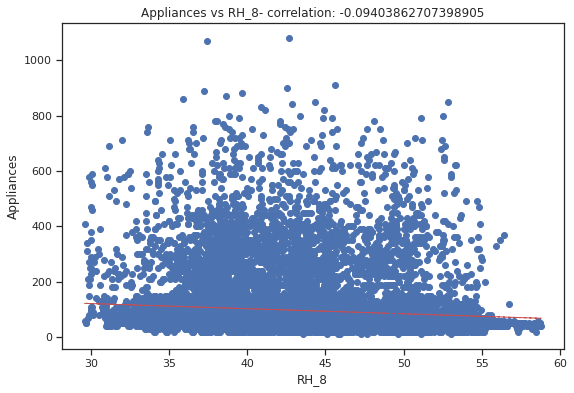

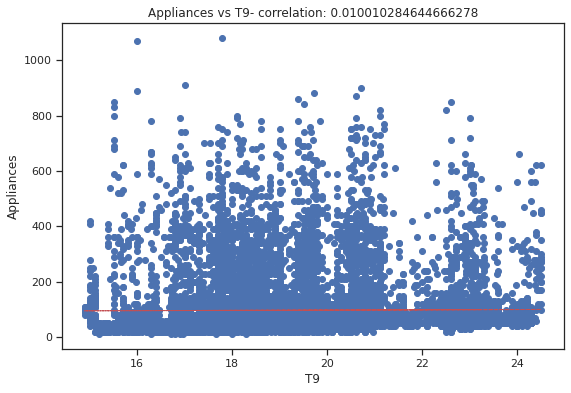

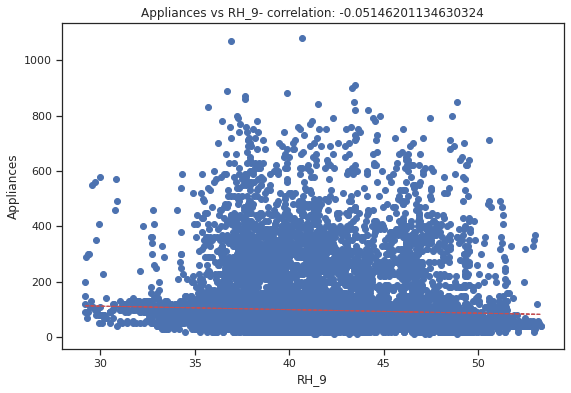

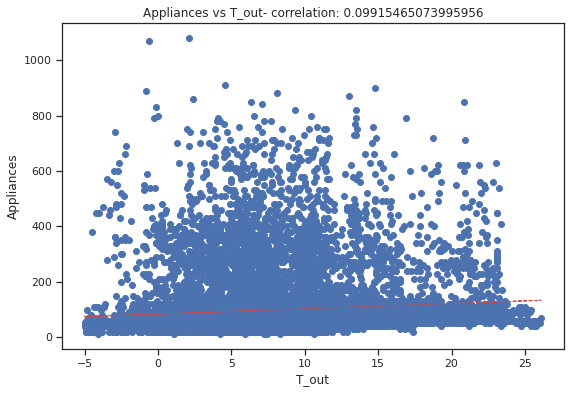

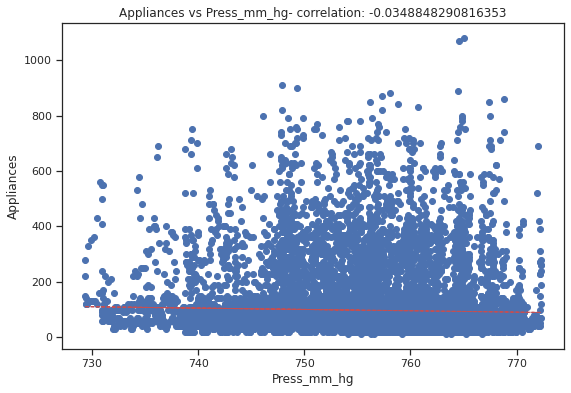

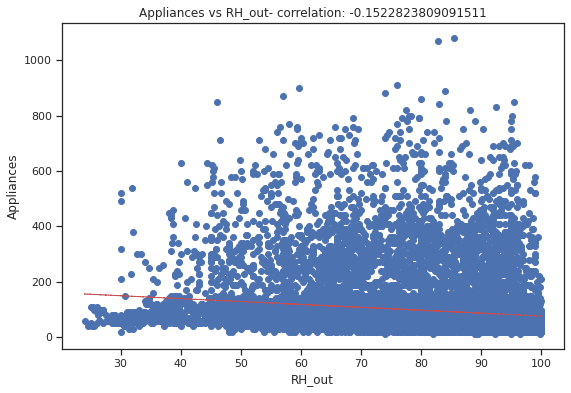

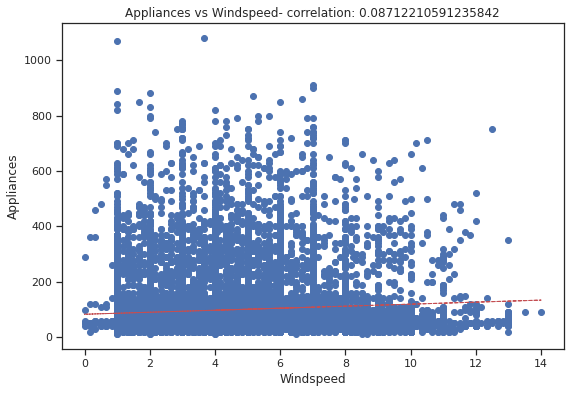

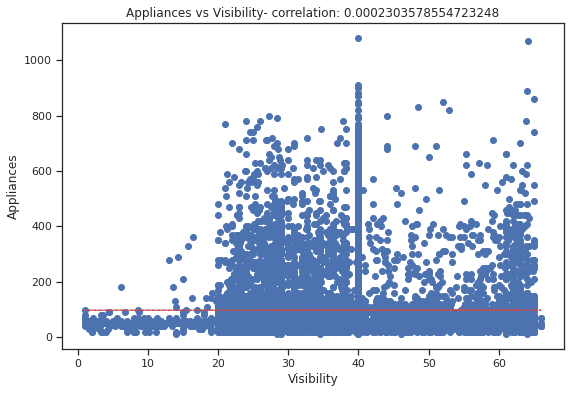

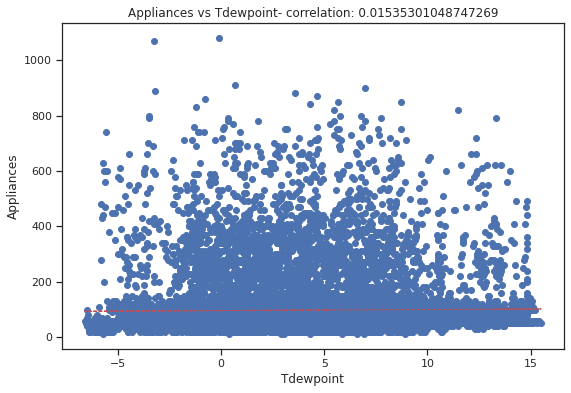

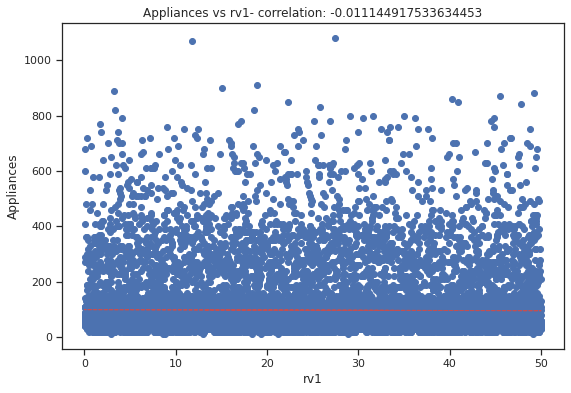

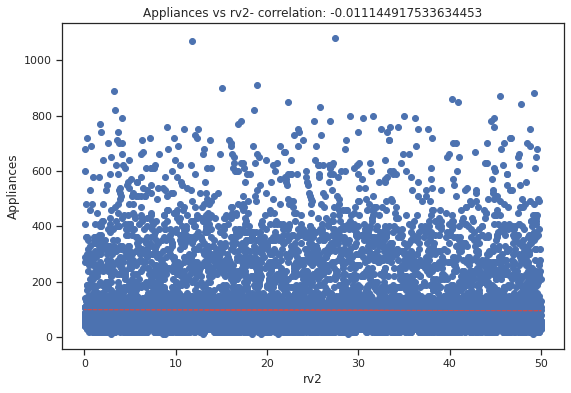

In [180]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Appliances'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

# We do not see any pattern in the data

# Numerical Variables

Since the numerical values are skewed we will perform log normal distribution

In [181]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  27


Appliances     T1       RH_1  ...  Tdewpoint        rv1        rv2
0          60  19.89  47.596667  ...        5.3  13.275433  13.275433
1          60  19.89  46.693333  ...        5.2  18.606195  18.606195
2          50  19.89  46.300000  ...        5.1  28.642668  28.642668
3          50  19.89  46.066667  ...        5.0  45.410389  45.410389
4          60  19.89  46.333333  ...        4.9  10.084097  10.084097

[5 rows x 27 columns]

In [182]:
continuous_feature=[feature for feature in numerical_features]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 27


# Outliers

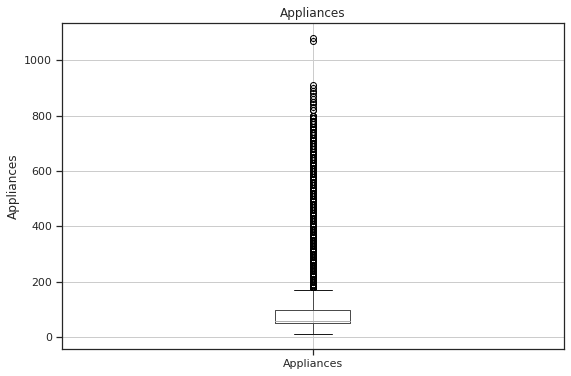

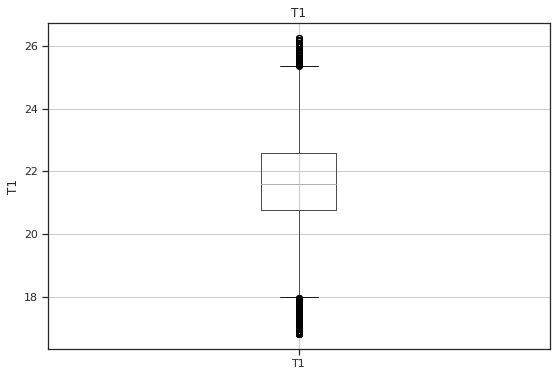

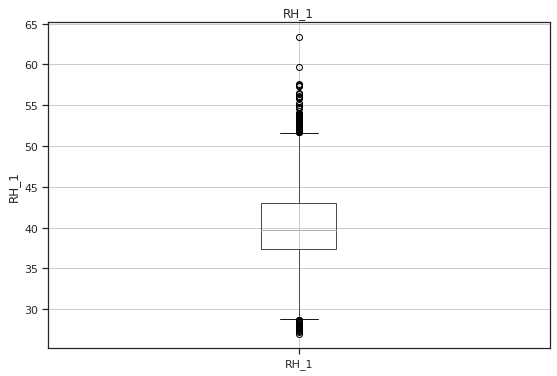

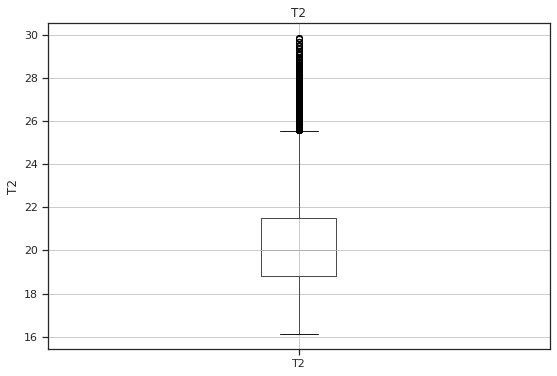

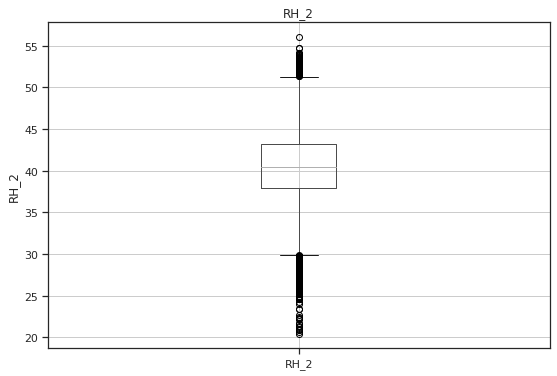

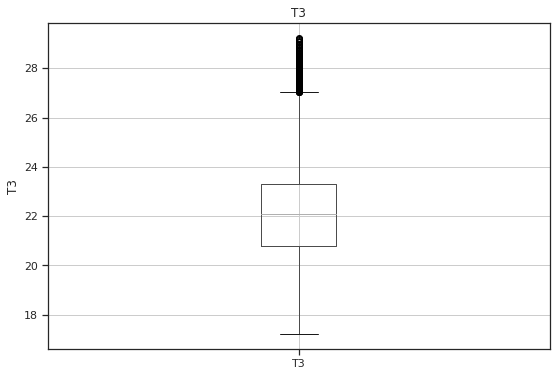

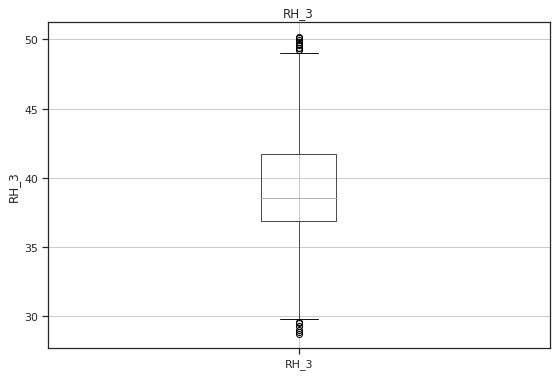

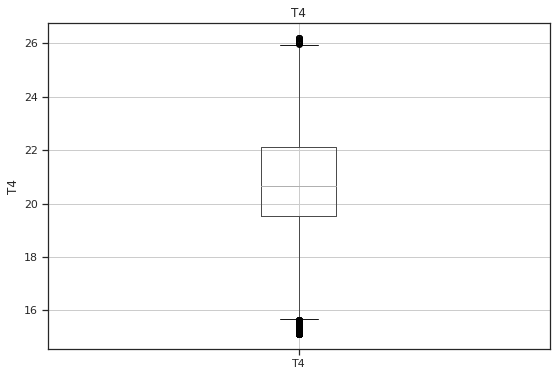

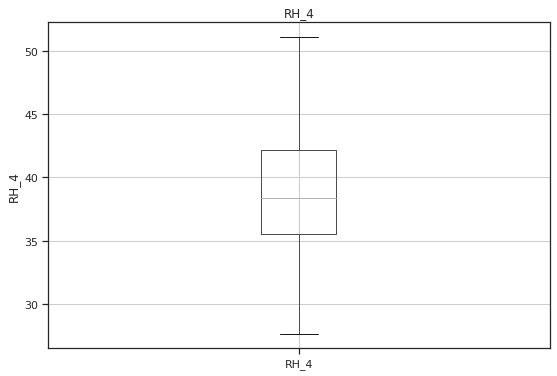

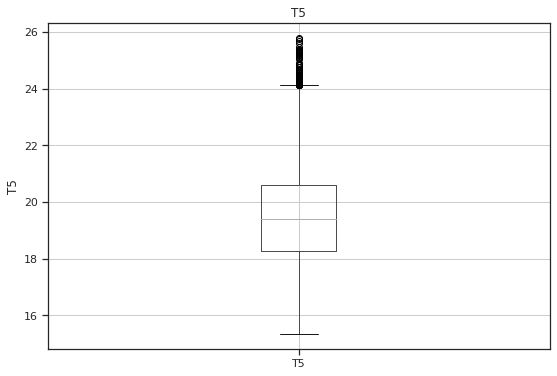

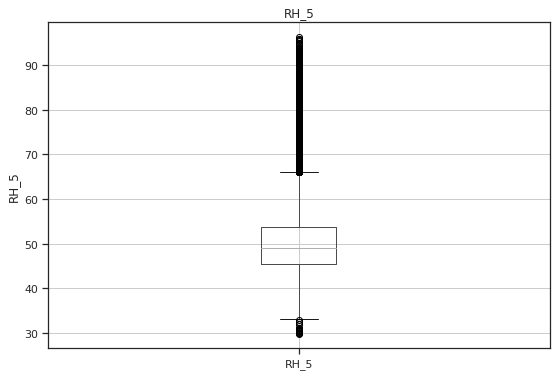

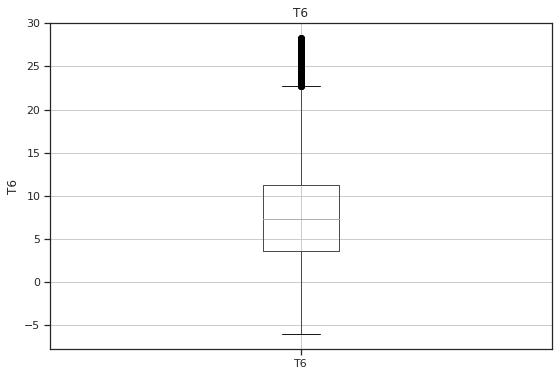

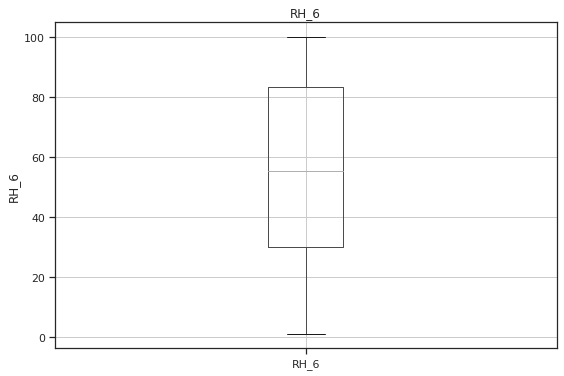

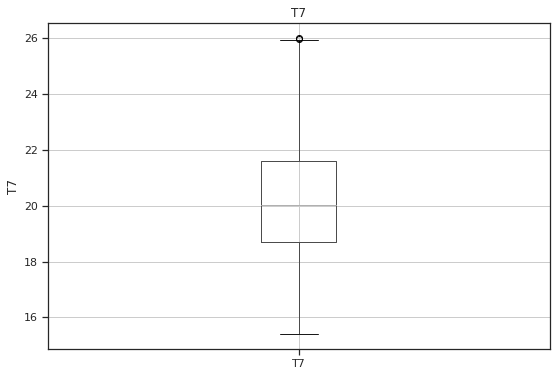

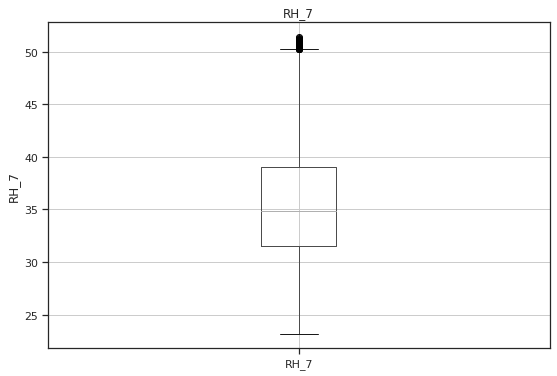

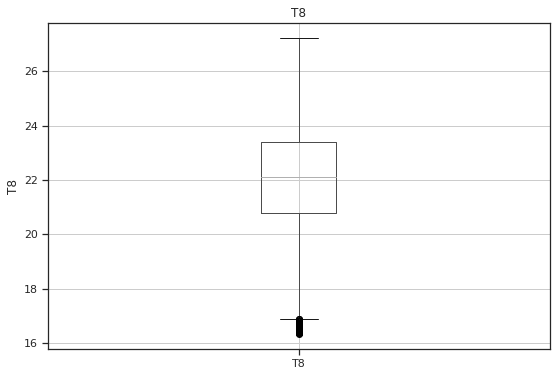

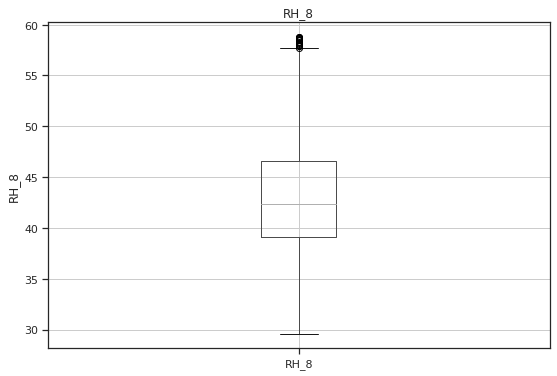

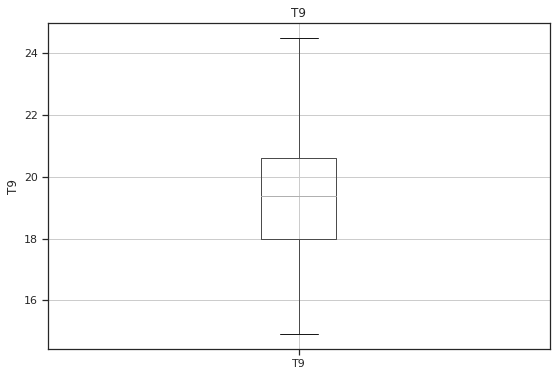

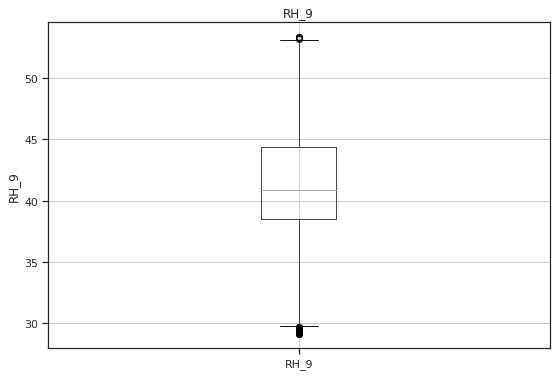

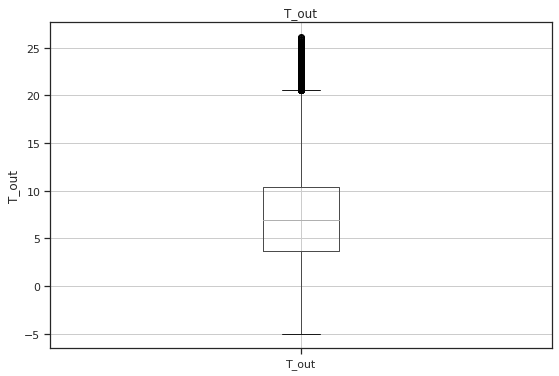

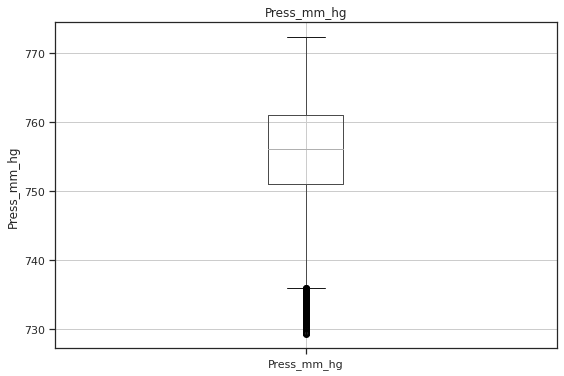

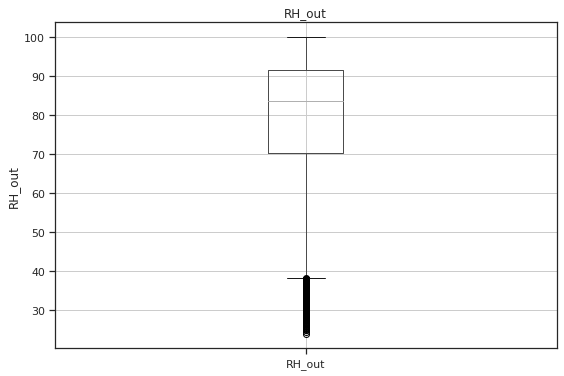

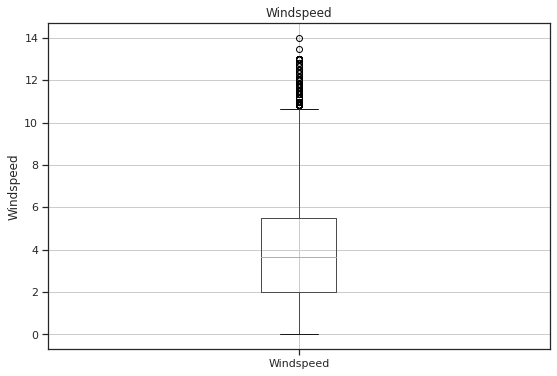

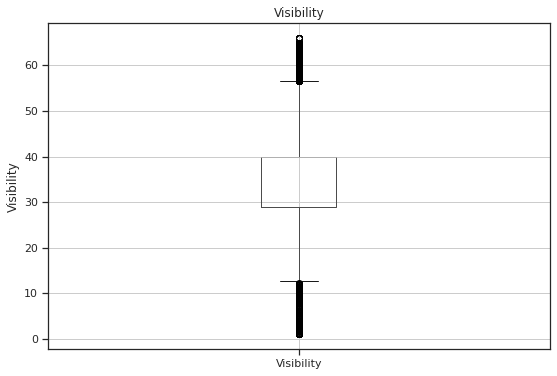

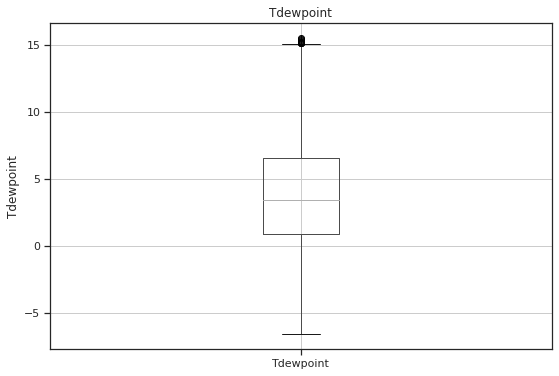

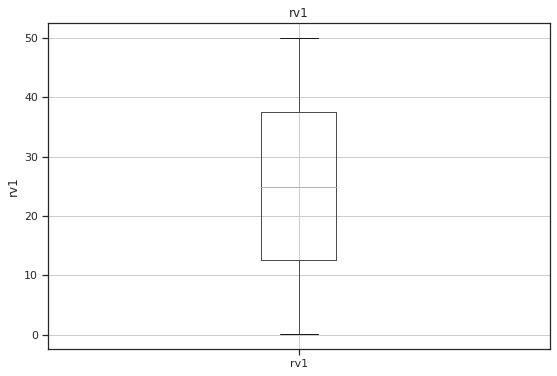

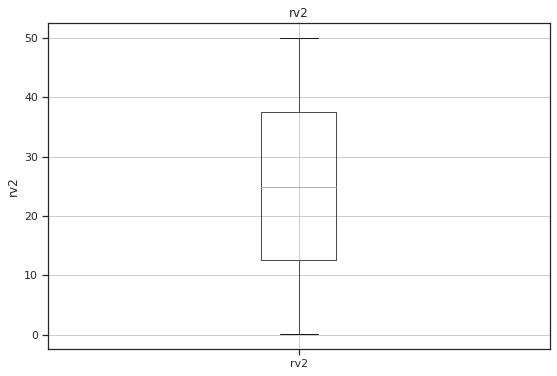

In [183]:
for feature in continuous_feature:
    fig = plt.figure(figsize=(9, 6))
    data=df.copy()
    data[feature]=(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# **Correlation Plot**

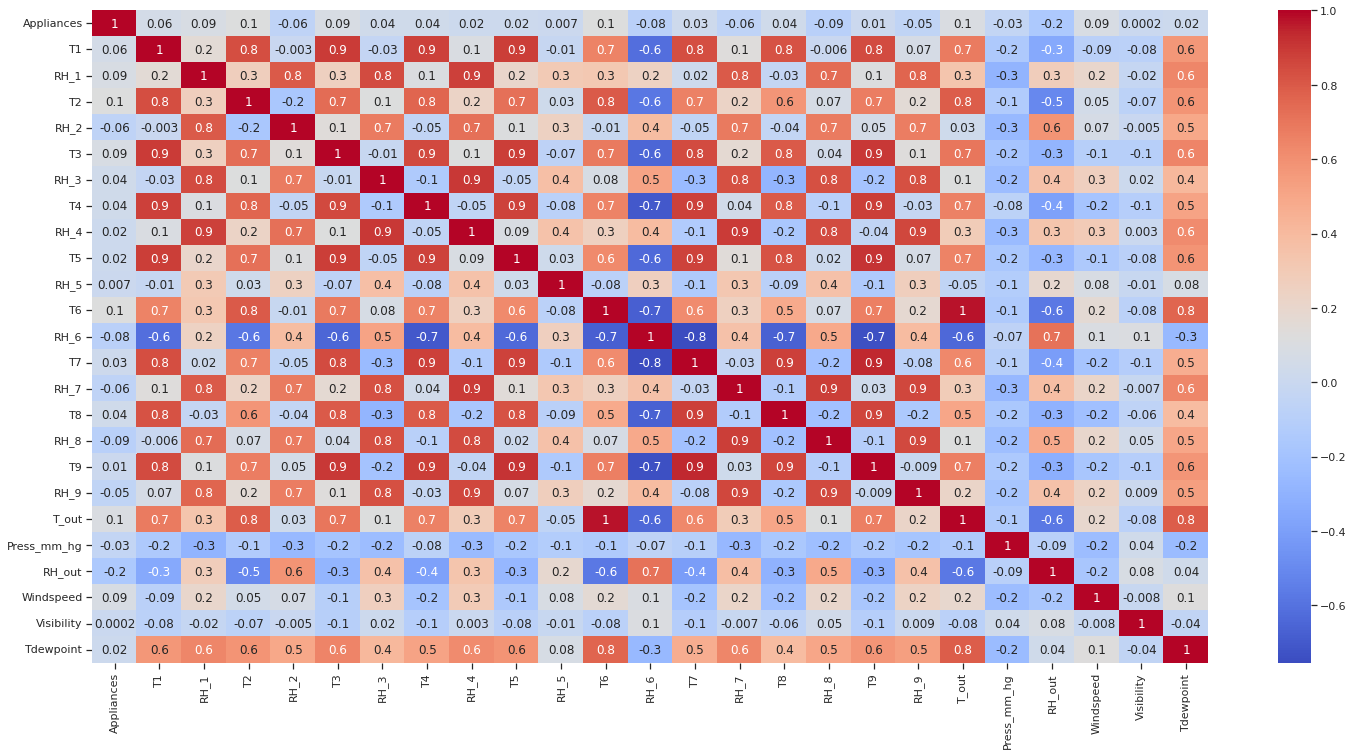

In [184]:
plt.figure(figsize = (25,12))
sns.heatmap(df.iloc[:, :-2].corr(), annot = True, fmt='.1g',cmap='coolwarm')
plt.show()

# **Bivariate horizontal Scatter plot**

In [185]:
df.columns

Index(['date', 'Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

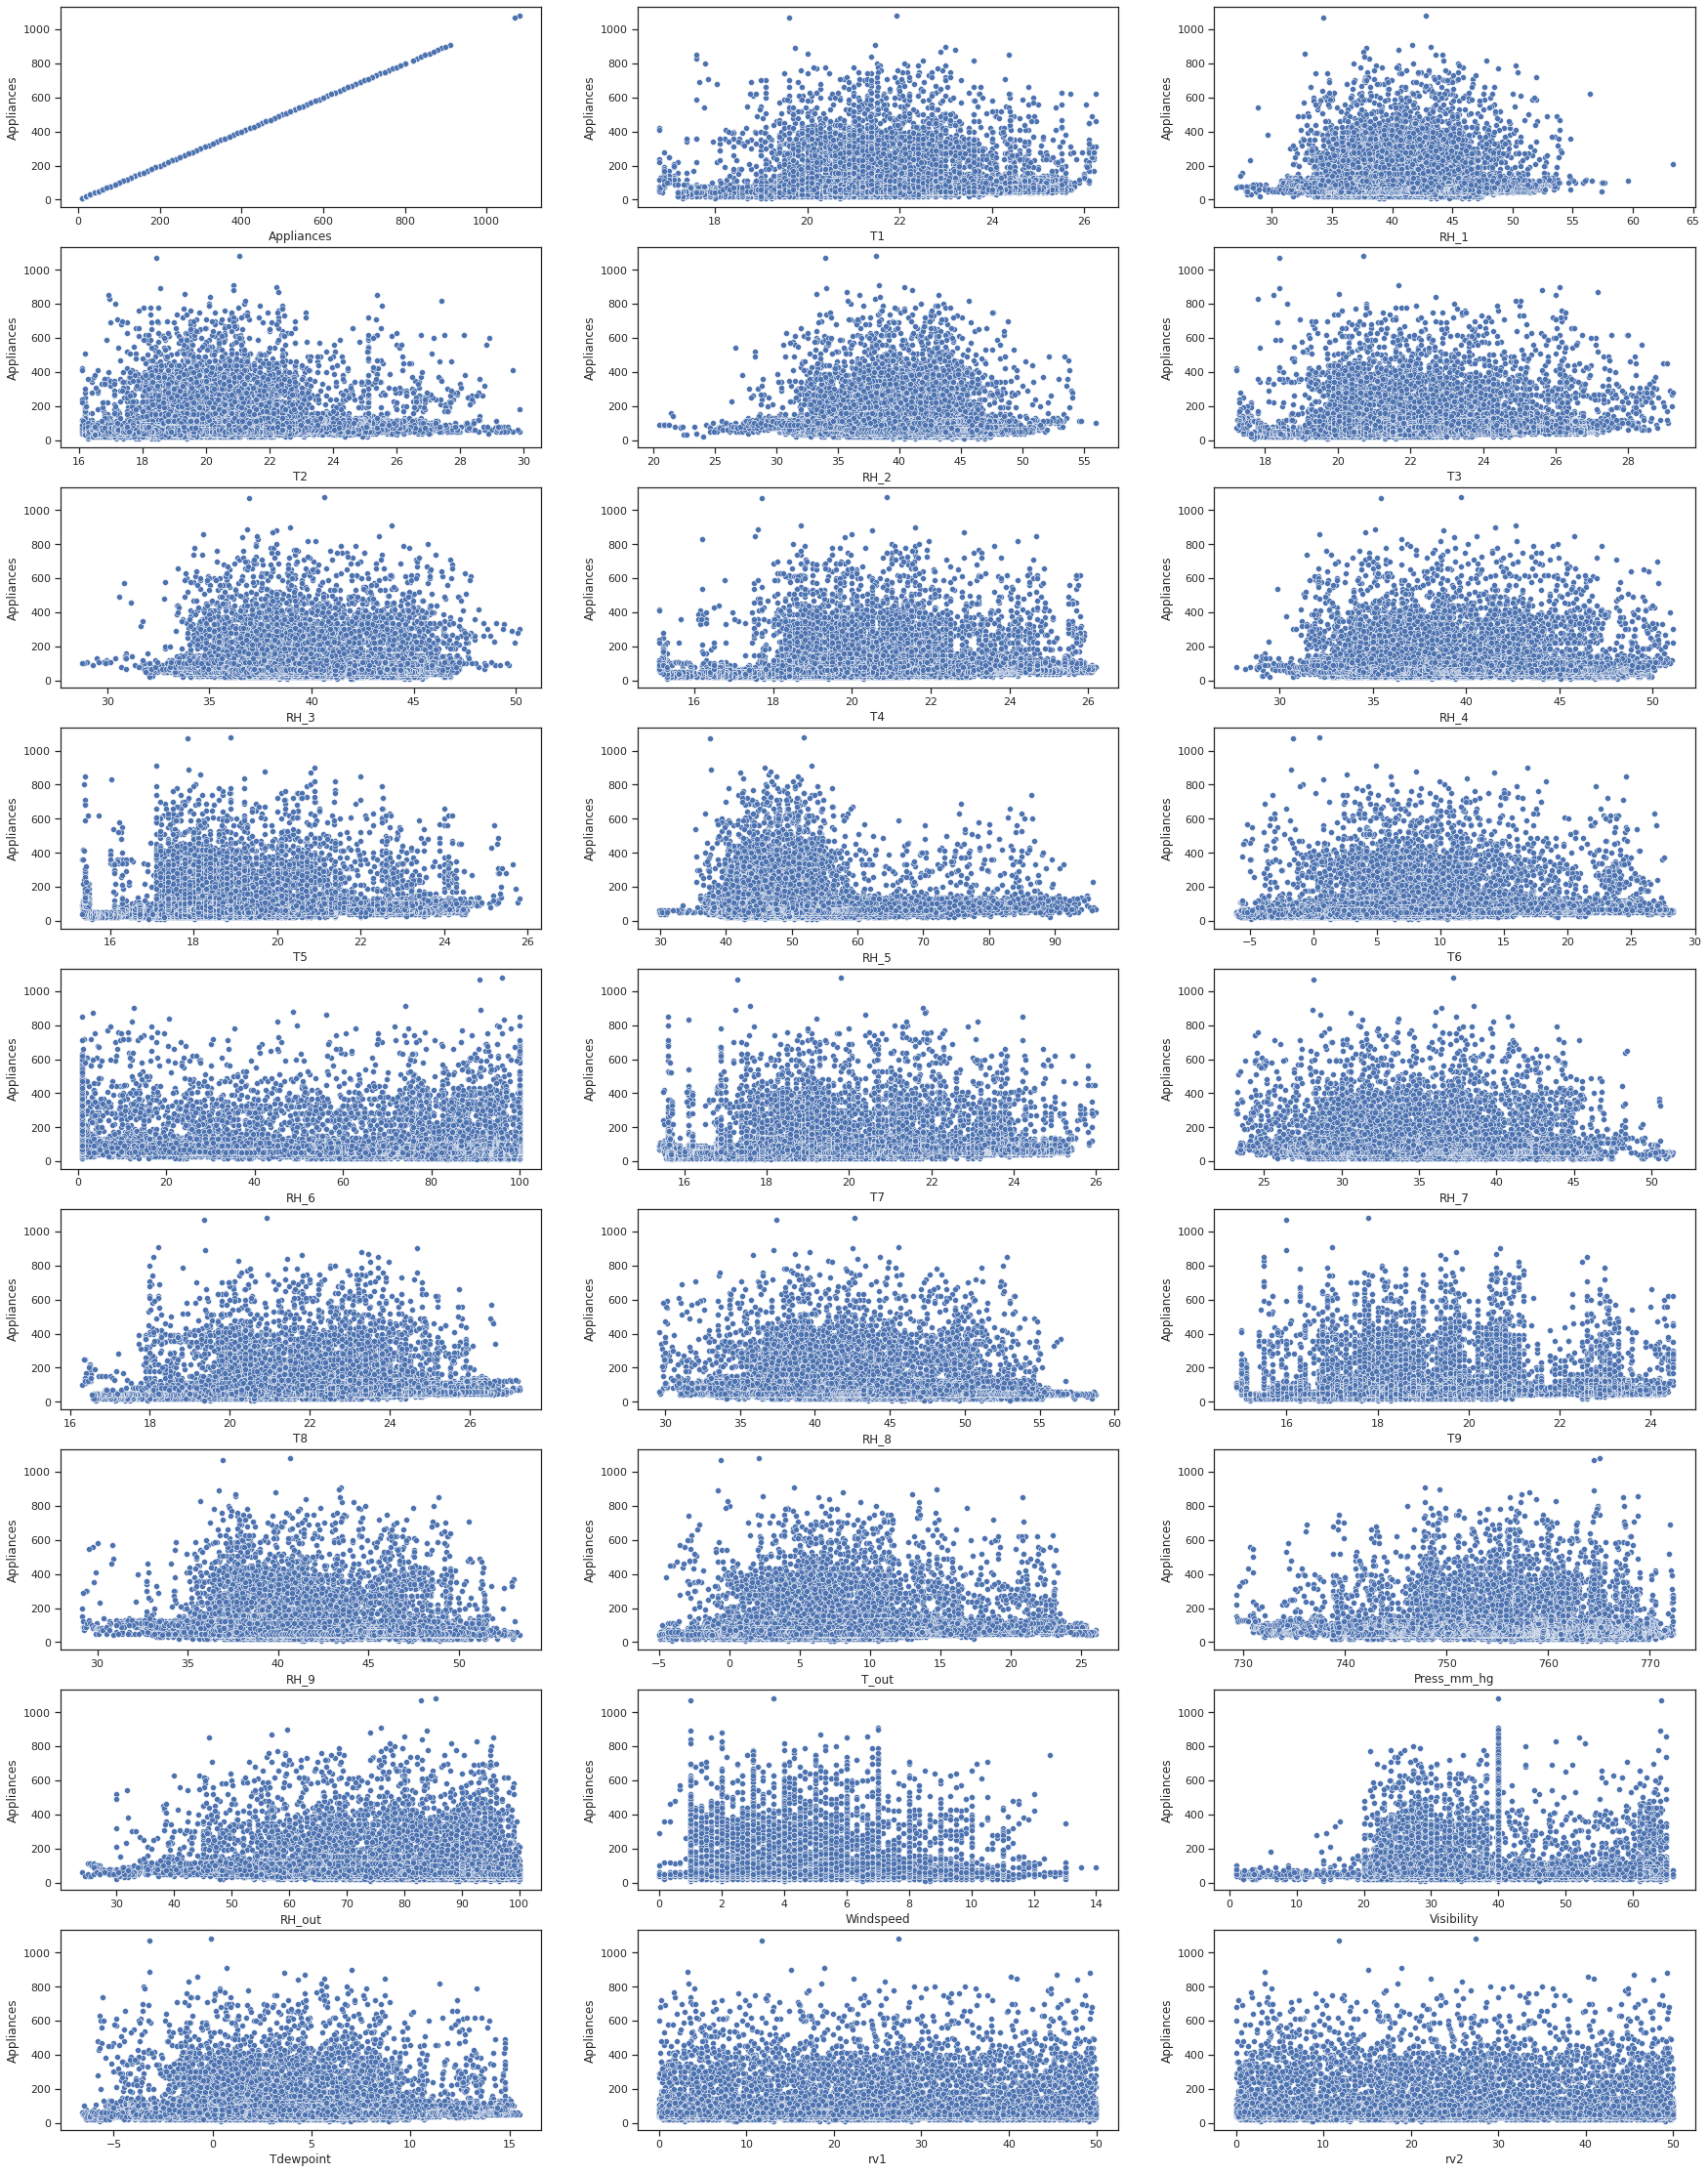

In [186]:
feature_vars = list(df.columns[1:])

ls = []
colName = [j for j in df[feature_vars]]
a = 0
while a < 10:
    for i in range(3):
        ls.append((a, i))
    a+=1

fig, ax = plt.subplots(9, 3, figsize=(30, 40))
for k in range(27):
    sns.scatterplot(data=df, x=feature_vars[k], y=df['Appliances'], ax=ax[ls[k][0], ls[k][1]])


# **Extracting date time features from the date column**

In [187]:
from datetime import datetime

In [188]:
df['date_1'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['exact_date'] = df['date_1'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))
df['day_name'] = df['date_1'].apply(lambda x: datetime.strftime(x, '%A'))
df['day_num'] = df['date_1'].apply(lambda x: datetime.strftime(x, '%w'))
df['hour']=(df['date'].str.split(' ').str[1].str.split(':').str[0]).astype(int)
df['minute']=(df['date'].str.split(' ').str[1].str.split(':').str[1]).astype(int)
df['sec']=(df['date'].str.split(' ').str[1].str.split(':').str[2]).astype(int)

df['no_seconds'] = (df['hour']*3600) + (df['minute']*60) + df['sec']
df['week_status'] = np.where((df['day_name']=='Saturday') | (df['day_name']=='Sunday'), 'Weekend', 'Weekday' )

In [189]:
df.head()

date  Appliances     T1  ...  sec  no_seconds  week_status
0  2016-01-11 17:00:00          60  19.89  ...    0       61200      Weekday
1  2016-01-11 17:10:00          60  19.89  ...    0       61800      Weekday
2  2016-01-11 17:20:00          50  19.89  ...    0       62400      Weekday
3  2016-01-11 17:30:00          50  19.89  ...    0       63000      Weekday
4  2016-01-11 17:40:00          60  19.89  ...    0       63600      Weekday

[5 rows x 37 columns]

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  object        
 1   Appliances   19735 non-null  int64         
 2   T1           19735 non-null  float64       
 3   RH_1         19735 non-null  float64       
 4   T2           19735 non-null  float64       
 5   RH_2         19735 non-null  float64       
 6   T3           19735 non-null  float64       
 7   RH_3         19735 non-null  float64       
 8   T4           19735 non-null  float64       
 9   RH_4         19735 non-null  float64       
 10  T5           19735 non-null  float64       
 11  RH_5         19735 non-null  float64       
 12  T6           19735 non-null  float64       
 13  RH_6         19735 non-null  float64       
 14  T7           19735 non-null  float64       
 15  RH_7         19735 non-null  float64       
 16  T8  

# **Plotting Features Over Time**

In [191]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [192]:
fig = px.line(df, x='date', y=df.Appliances)
fig.show()



*   We can see that there peaks of high appliance usage and low appliance usage. This could probably indicate night time and day time.








*  There are two large gaps in appliance usage. 

 *   between 21 Jan 2016 and 30 Jan 2016
 *    between 1 April 2016 and 3 April 2016






# **Mean appliance usage with respect to different time features**

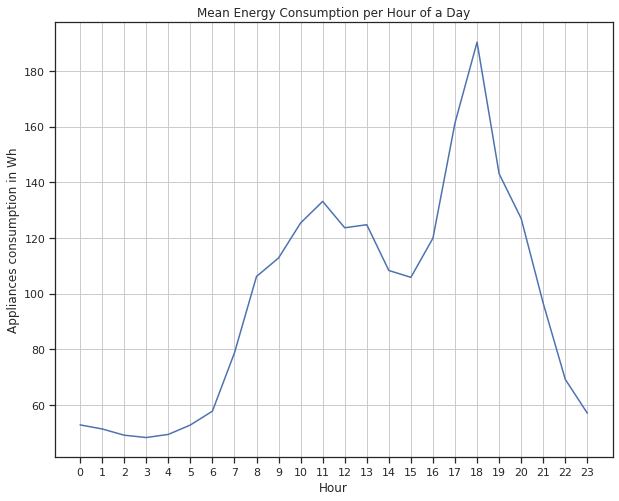

In [193]:
# Mean Energy Consumption per Hour

df.groupby('hour')['Appliances'].mean().plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks)
plt.grid()
plt.show()



1.   List itemDuring night time appliance usage is low.
2.   High during morning hours
3. And it peaks during the evening.


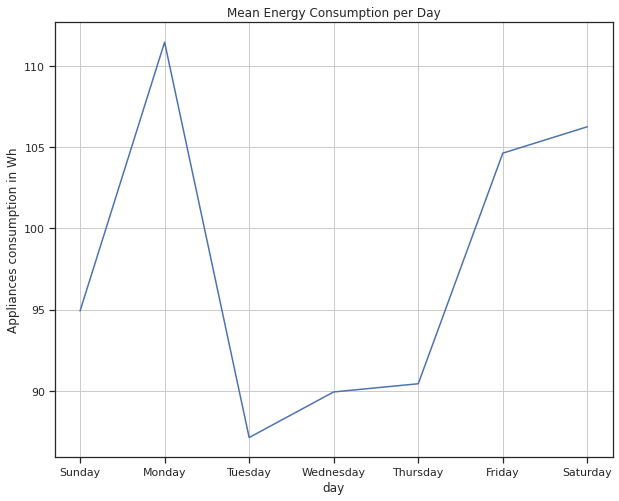

In [194]:
# Mean Energy Consumption on different days of the week

df.groupby('day_num')['Appliances'].mean().plot(figsize=(10,8))
plt.xlabel('day')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 7, 1))
plt.title('Mean Energy Consumption per Day')

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks, labels=labels)
plt.grid()
plt.show()

In [195]:
df.columns

Index(['date', 'Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'date_1', 'exact_date', 'day_name',
       'day_num', 'hour', 'minute', 'sec', 'no_seconds', 'week_status'],
      dtype='object')

In [196]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [197]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances',"T1","RH_1","T2","RH_2","T3","rv1","rv2"]]])

variables          VIF
0          RH_3  1172.066516
1            T4   719.214845
2          RH_4  1118.879894
3            T5  1066.571279
4          RH_5    45.146306
5            T6    70.546319
6          RH_6    38.734131
7            T7  1590.200341
8          RH_7   512.282315
9            T8   840.395816
10         RH_8   619.451968
11           T9  2249.055377
12         RH_9   671.521983
13        T_out   379.891092
14  Press_mm_hg  2041.732109
15       RH_out  1272.573342
16    Windspeed     5.160246
17   Visibility    11.985022
18    Tdewpoint   125.378914
19         hour          inf
20       minute          inf
21          sec          NaN
22   no_seconds          inf

In [198]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances']]])

variables          VIF
0            T1  3664.347819
1          RH_1  1671.058083
2            T2  2490.936861
3          RH_2  2164.751149
4            T3  1245.645897
5          RH_3  1569.481399
6            T4   933.040914
7          RH_4  1383.248317
8            T5  1188.898501
9          RH_5    45.857003
10           T6    89.480400
11         RH_6    40.329216
12           T7  1613.615749
13         RH_7   518.967050
14           T8   991.596066
15         RH_8   630.583152
16           T9  2621.121590
17         RH_9   682.208827
18        T_out   399.746674
19  Press_mm_hg  2136.911569
20       RH_out  1303.387506
21    Windspeed     5.245808
22   Visibility    12.029748
23    Tdewpoint   133.415103
24          rv1          inf
25          rv2          inf
26         hour          inf
27       minute          inf
28          sec          NaN
29   no_seconds          inf